# Введение в искусственные нейронные сети
# Урок 6. Сегментация
## Практическое задание   


Вариант 1
<ol>
<li>Попробуйте обучить нейронную сеть U-Net на любом другом датасете.  
<li>Опишите, какой результата вы получили? Что помогло вам улучшить качество сети?  
</ol>

Вариант 2  
*Попробуйте свои силы в задаче Carvana на Kaggle - https://www.kaggle.com/c/carvana-image-masking-challenge/overview<br>   
Вариант 3   
*Сделайте свою реализацию U-Net на TensorFlow  

### Подключение библиотек и скриптов

In [7]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:72.5% !important; }</style>"))

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Tensorflow with TPU

In [10]:
# import os

# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices('TPU'))

### Tensorflow with GPU

In [11]:
# %tensorflow_version 2.x
# import timeit

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#     print(
#       '\n\nThis error most likely means that this notebook is not '
#       'configured to use a GPU.  Change this in Notebook Settings via the '
#       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
#     raise SystemError('GPU device not found')

# def cpu():
#     with tf.device('/cpu:0'):
#         random_image_cpu = tf.random.normal((100, 100, 100, 3))
#         net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
#         return tf.math.reduce_sum(net_cpu)

# def gpu():
#     with tf.device('/device:GPU:0'):
#         random_image_gpu = tf.random.normal((100, 100, 100, 3))
#         net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
#         return tf.math.reduce_sum(net_gpu)
  
# # We run each op once to warm up; see: https://stackoverflow.com/a/45067900
# cpu()
# gpu()

# # Run the op several times.
# print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
#       '(batch x height x width x channel). Sum of ten runs.')
# print('CPU (s):')
# cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
# print(cpu_time)
# print('GPU (s):')
# gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
# print(gpu_time)
# print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

### Загрузка данных

In [12]:
data = pd.read_csv('airline-passengers.csv', skipfooter = 5, engine='python')

### Изучение датасета

In [13]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
data.tail()

,Month,Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622


In [15]:
data.shape

(139, 2)

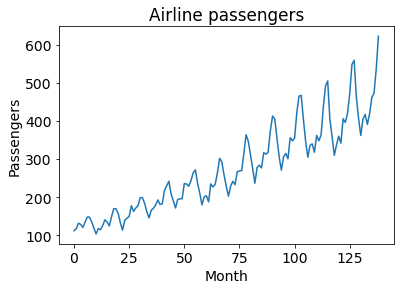

In [16]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Airline passengers')
plt.show()

### Построение модели

In [17]:
# Preprocessing
dataset = dataset.reshape(-1, 1)
dataset = dataset.astype('float32')
dataset.shape

(139, 1)

In [18]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [19]:
train_size = int(len(dataset)*0.54)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train),len(test))

75 64


In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
time_temp = 10
X_temp = []
Y_temp = []
for i in range(len(train)-time_temp-1):
    a = train[i:(i+time_temp), 0]
    X_temp.append(a)
    Y_temp.append(train[i + time_temp, 0])
X_train = np.array(X_temp)
y_train = np.array(Y_temp)  

In [21]:
X_temp = []
Y_temp = []
for i in range(len(test)-time_temp-1):
    a = test[i:(i+time_temp), 0]
    X_temp.append(a)
    Y_temp.append(test[i + time_temp, 0])
X_test = np.array(X_temp)
y_test = np.array(Y_temp)  

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Model

In [23]:
model = Sequential([
    LSTM(15, input_shape=(1,time_temp)),
    Dense(1)
])

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
%%time
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 5/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 6/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 7/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 8/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 9/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 10/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 11/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 12/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 13/50
64/64 [==============================

In [26]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.58 RMSE
Test Score: 35.93 RMSE


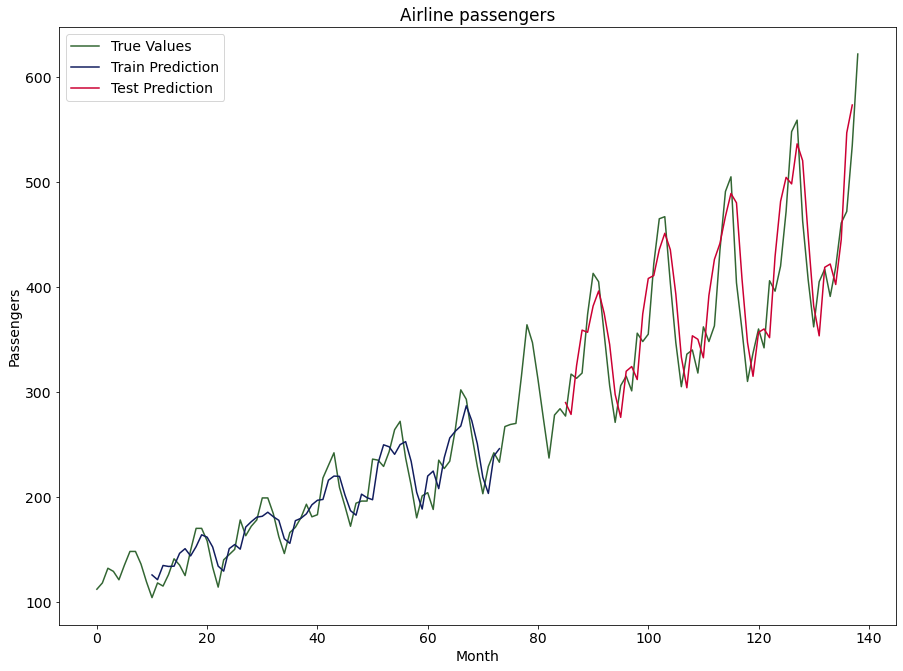

In [42]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_temp:len(trainPredict)+time_temp, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_temp*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize = (15, 11))
plt.plot(scaler.inverse_transform(dataset), label = 'True Values', color='#336633')
plt.plot(trainPredictPlot, label='Train Prediction', color='#111d5e')
plt.plot(testPredictPlot, label = 'Test Prediction', color='#CC0033')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Airline passengers')
plt.legend()
plt.savefig(fname = 'Results')
plt.show()

### Вывод:
В результате текущего практического задания, была реализована RNN(рекурентная нейронная сеть с LSTM). Прогноз временных рядов(Time series forecasting), для небольшого набора данных - 'Airline passengers' не идеален, но для обучения более, чем приемлем. Повышение точности произошло за счет подбора размера выборки, а также параметров модели.

## *Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM

![image](LSTM_Card.png)

In [46]:
from scipy.special import expit as sigmoid

def forget_gate(x, h, Weights_hf, Bias_hf, Weights_xf, Bias_xf, prev_cell_state):
    forget_hidden  = np.dot(Weights_hf, h) + Bias_hf
    forget_eventx  = np.dot(Weights_xf, x) + Bias_xf
    return np.multiply( sigmoid(forget_hidden + forget_eventx), prev_cell_state )

def input_gate(x, h, Weights_hi, Bias_hi, Weights_xi, Bias_xi, Weights_hl, Bias_hl, Weights_xl, Bias_xl):
    ignore_hidden  = np.dot(Weights_hi, h) + Bias_hi
    ignore_eventx  = np.dot(Weights_xi, x) + Bias_xi
    learn_hidden   = np.dot(Weights_hl, h) + Bias_hl
    learn_eventx   = np.dot(Weights_xl, x) + Bias_xl
    return np.multiply( sigmoid(ignore_eventx + ignore_hidden), np.tanh(learn_eventx + learn_hidden) )


def cell_state(forget_gate_output, input_gate_output):
    return forget_gate_output + input_gate_output

  
def output_gate(x, h, Weights_ho, Bias_ho, Weights_xo, Bias_xo, cell_state):
    out_hidden = np.dot(Weights_ho, h) + Bias_ho
    out_eventx = np.dot(Weights_xo, x) + Bias_xo
    return np.multiply( sigmoid(out_eventx + out_hidden), np.tanh(cell_state))

In [47]:
#Set Parameters for a small LSTM network
input_size  = 2 # size of one 'event', or sample, in our batch of data
hidden_dim  = 3 # 3 cells in the LSTM layer
output_size = 1 # desired model output

def model_output(lstm_output, fc_Weight, fc_Bias):
  '''Takes the LSTM output and transforms it to our desired 
  output size using a final, fully connected layer'''
  return np.dot(fc_Weight, lstm_output) + fc_Bias

### Creating the data

In [28]:
import string

In [29]:
data = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them. To die—to sleep,
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to: 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep, perchance to dream—ay, there's the rub:
For in that sleep of death what dreams may come,
When we have shuffled off this mortal coil,
Must give us pause—there's the respect
That makes calamity of so long life.
For who would bear the whips and scorns of time,
Th'oppressor's wrong, the proud man's contumely,
The pangs of dispriz'd love, the law's delay,
The insolence of office, and the spurns
That patient merit of th'unworthy takes,
When he himself might his quietus make
"""

### Data preparation

In [30]:
# remove \n
data = data.replace("\n", " ")

# lower cases
data = data.lower()

# remove punctuation
data = data.translate(str.maketrans('', '', string.punctuation))

# remove first and last character
data = data[1:-1]

In [31]:
data

'to be or not to be that is the question whether tis nobler in the mind to suffer the slings and arrows of outrageous fortune or to take arms against a sea of troubles and by opposing end them to die—to sleep no more and by a sleep to say we end the heartache and the thousand natural shocks that flesh is heir to tis a consummation devoutly to be wishd to die to sleep to sleep perchance to dream—ay theres the rub for in that sleep of death what dreams may come when we have shuffled off this mortal coil must give us pause—theres the respect that makes calamity of so long life for who would bear the whips and scorns of time thoppressors wrong the proud mans contumely the pangs of disprizd love the laws delay the insolence of office and the spurns that patient merit of thunworthy takes when he himself might his quietus make'

### Prepare dictionaries

In [32]:
chars = sorted(set(data))

char_to_idx = {c:i for (i,c) in enumerate(chars)}
idx_to_char = {i:c for (i,c) in enumerate(chars)}

### Prepare the parameters

In [33]:
data_size, char_size = len(data), len(chars)

hidden_size = 10
weight_sd = 0.1
z_size = hidden_size + char_size
t_steps = 25

### Activations functions

In [34]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    return y * (1 - y)

def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1 - y * y

### LSTM architecture

![image](LSTM.png)

### LSTM implementation

In [35]:
def forward(x, u, q):
    z = np.row_stack((q, x))

    a = sigmoid(np.dot(wa, z) + ba)
    b = sigmoid(np.dot(wb, z) + bb)
    c = tanh(np.dot(wc, z) + bc)
    d = sigmoid(np.dot(wd, z) + bd)

    e = a * u + b * c
    h = d * tanh(e)

    v = np.dot(wv, h) + bv
    y = np.exp(v) / np.sum(np.exp(v))

    return z, a, b, c, d, e, h, v, y

In [36]:
def optimize(grads, theta, lr=0.05):
    dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv = grads
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = theta
    
    wa -= dwa * lr
    wb -= dwb * lr
    wc -= dwc * lr
    wd -= dwd * lr
    wv -= dwv * lr
    
    ba -= dba * lr
    bb -= dbb * lr
    bc -= dbc * lr
    bd -= dbd * lr
    bv -= dbv * lr
    
    return wa, wb, wc, wd, wv, ba, bb, bc, bd, bv

### Initialize the variables

In [37]:
losses = {}
z, a, b, c, d, e, h, v, y = {}, {}, {}, {}, {}, {}, {}, {}, {}
q, x, u = {}, {}, {}

In [38]:
wa, wb, wc, wd = [np.random.randn(hidden_size, z_size) * weight_sd + 0.5 for x in range(4)]
ba, bb, bc, bd = [np.zeros((hidden_size, 1)) for x in range(4)]

# output
wv = np.random.randn(char_size, hidden_size) * weight_sd
bv = np.zeros((char_size, 1))

In [39]:
q[-1] = np.zeros((hidden_size, 1))
u[-1] = np.zeros((hidden_size, 1))

pointer = 25
t_steps = 25

inputs = ([char_to_idx[ch] for ch in data[pointer: pointer + t_steps]])
targets = ([char_to_idx[ch] for ch in data[pointer + 1: pointer + t_steps + 1]])

### Training

In [40]:
for epoch in range(1000):
    
    loss = 0
    
    # Forward propagation
    for t in range(len(inputs)):
        x[t] = np.zeros((char_size, 1))
        x[t][inputs[t]] = 1

        z[t], a[t], b[t], c[t], d[t], e[t], h[t], v[t], y[t] = forward(x[t], u[t - 1], q[t - 1])

        u[t], q[t] = e[t], h[t]

        loss += -np.log(y[t][targets[t], 0])


    dh_next = np.zeros_like(q[0])
    de_next = np.zeros_like(u[0])
    dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

    # Backward propagation
    for t in reversed(range(len(inputs))):
        target = targets[t]

        dv = np.copy(y[t])
        dv[target] -= 1

        dwv += np.dot(dv, h[t].T)
        dbv += dv

        dh = np.dot(wv.T, dv)
        dh += dh_next

        dd = dh * tanh(e[t])
        dd = dsigmoid(d[t]) * dd

        dwd += np.dot(dd, z[t].T)
        dbd += dd

        de = np.copy(de_next)
        de += dh * d[t] * dtanh(tanh(e[t]))

        dc = de * b[t]
        dc = dtanh(c[t]) * dc

        dwc += np.dot(dc, z[t].T)
        dbc += dc

        db = de * dc
        db = dsigmoid(b[t]) * db

        dwb += np.dot(db, z[t].T)
        dbb += db

        da = de * u[t - 1]
        da = dsigmoid(a[t]) * da

        dwa += np.dot(da, z[t].T)
        dba += da

        dz = (np.dot(wa.T, da) 
              + np.dot(wb.T, db) 
              + np.dot(wc.T, dc) 
              + np.dot(dd.T, dd))

        dh_next = dz[:hidden_size, :]
        de_next = a[t] * de

    
    grads = dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv
    theta = wa, wb, wc, wd, wv, ba, bb, bc, bd, bv

    # optimize with SGD the training data
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = optimize(grads, theta)
        
    losses[epoch] = loss

### Plotting the graph

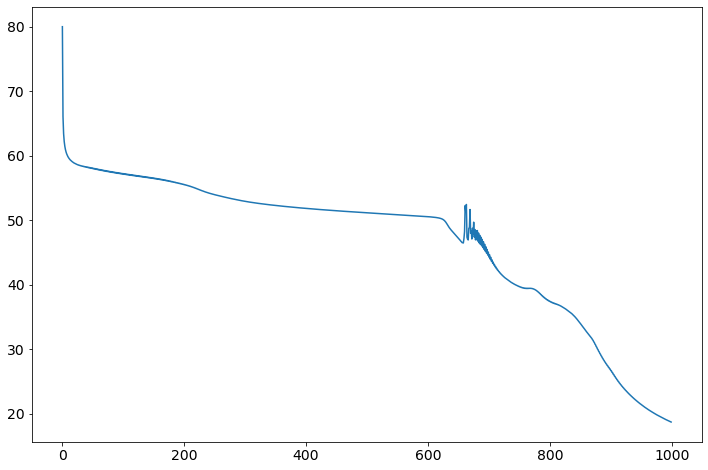

In [44]:
plt.figure(figsize = (12, 8))
plt.plot(list(losses.keys()), [losses[x] for x in list(losses.keys())])